# Evaluación de Supuestos

Debido al **Teorema de Gauss-Markov**, queremos que los supuestos del modelo se cumplan.  

En las siguientes clases consideraremos las implicaciones de la **violación de supuestos**:

- ¿Cómo identificamos si se está violando un supuesto?  
- ¿Qué debemos hacer cuando no se cumple alguno de los supuestos?  
- ¿Cómo solucionamos el problema?  

## Multicolinealidad

Si se presenta una fuerte correlación entre dos o más variables de la matrix $X$, es posible que se viole el supuesto de **no multicolinealidad**. 

Suponga que queremos estimar el modelo: 

$$y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \varepsilon_i$$

Si $x_2$ se puede escribir como una **combinación lineal** de la variable $x_1$, entonces la multicolinealidad es **perfecta** y el modelo **no es estimable**. Ejemplo:

$$x_{2i} = c_1 + c_2 x_{1i}, \hspace{5pt}\text{con}\hspace{5pt} c_1, c_2 \in \mathbb{R}$$

Si existe una **correlación fuerte** (pero no perfecta) entre $x_1$ y $x_2$, la multicolinealidad es **imperfecta**. En este caso, el modelo es **estimable**, pero la precisión de nuestros estimadores se ve comprometida. Esto afecta los intervalos de confianza y las pruebas de hipótesis (o significancia estadística). 

## ¿Cómo identificar multicolinealidad?

En nuestro modelo con 2 variables independientes, se puede mostrar que 

$$V(\hat\beta_1) = \frac{\sigma^2}{\sum_{i = 1}^n x^2_{1i} (1 - \rho_{1, 2})}$$

donde $\rho_{1, 2}$ es el coeficiente de correlación entre $x_1$ y $x_2$. 

Observe que si la correlación entre ambas variables es cercana a 1, $V(\hat\beta_1)$ es muy grande y, por lo tanto, es difícil rechazar la hipotesis nula $H_0: \beta_1 = 0$.

Podemos sospechar que existe multicolinealidad cuando tenemos **pruebas individuales no significativas**, pero el estadístico $F$ y coeficiente de determinacion $R^2$ son muy grandes. 

También podemos calcular $|\rho_{1, 2}|$ y determinar si este valor es cercano a 1.

**Solución**: excluir una de las variables!

In [1]:
w <- c(0.8, 1, 1.4, 1.2, 1.8, 2, 1.8, 2.1, 2.7, 3.0) #Salarios
s <- c(1, 1, 2, 2, 3, 3, 4, 4, 5, 5) #educacion
f <- c(1, 0, 1, 0, 1, 0, 1, 0, 1, 0) #mujer=1, hombre=0
s_mp <- 1 + 2*s
s_imp <- c(1, 1, 2, 1, 3, 3, 4, 4, 5, 5)

summary(lm(w ~ s))


Call:
lm(formula = w ~ s)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4350 -0.1113  0.0150  0.1163  0.3100 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.41500    0.16490   2.517    0.036 *  
s            0.45500    0.04972   9.152 1.64e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2223 on 8 degrees of freedom
Multiple R-squared:  0.9128,	Adjusted R-squared:  0.9019 
F-statistic: 83.75 on 1 and 8 DF,  p-value: 1.639e-05


In [2]:
rho <- cor(s, s_mp); print(paste0('Correlacion entre s y s_mp = ', rho))
summary(lm(w ~ s + s_mp))

[1] "Correlacion entre s y s_mp = 1"



Call:
lm(formula = w ~ s + s_mp)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4350 -0.1113  0.0150  0.1163  0.3100 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.41500    0.16490   2.517    0.036 *  
s            0.45500    0.04972   9.152 1.64e-05 ***
s_mp              NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2223 on 8 degrees of freedom
Multiple R-squared:  0.9128,	Adjusted R-squared:  0.9019 
F-statistic: 83.75 on 1 and 8 DF,  p-value: 1.639e-05


In [3]:
rho <- cor(s, s_imp); print(paste0('Correlacion entre s y s_imp = ', rho))
summary(lm(w ~ s + s_imp))

[1] "Correlacion entre s y s_imp = 0.981265558383595"



Call:
lm(formula = w ~ s + s_imp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44235 -0.07456  0.00765  0.08868  0.31000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.4518     0.1833   2.465   0.0432 *
s             0.3006     0.2694   1.116   0.3013  
s_imp         0.1471     0.2518   0.584   0.5775  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2321 on 7 degrees of freedom
Multiple R-squared:  0.9169,	Adjusted R-squared:  0.8931 
F-statistic:  38.6 on 2 and 7 DF,  p-value: 0.0001657


## No-normalidad de Errores

Nuestro modelo asume que los errores se distribuyen normales, es decir

$$
\varepsilon \sim N(0, \sigma^2 I)
$$

- Debido al **Teorema del Límite Central** es un supuesto muy razonable.  
- No tiene implicaciones graves.  
- No es necesario en la demostración de **Gauss-Markov**.
- Sin embargo, es útil para determinar la distribución de los **estadísticos** usados en las pruebas de significancia.

Para evaluar si el supuesto se cumple o no se puede hacer un procedimiento muy sencillo.

- Computamos los residuales y los graficamos.
- Generalmente, estos residuales van a tener una distribución muy parecida a la normal.
- Debido a que incluimos una constante en nuestra regresión, los residuales casi siempre tienen media cero. 

Adicionalmente, se puede hacer un test para evaluar la normalidad de la variable.

Este supuesto se cumplir a a medida que aumentemos el tamaño de muestra.

In [4]:
model <- lm(log(wage) ~ educ + exper + expersq + female, data = wage1)
e <- model$residuals

par(mfrow=c(1,2))
hist(e, xlab = "Residuals", probability = T, ylim = c(0, 1)) #Histograma de esiduales
lines(density(e, na.rm=T), lwd = 2, col = "red") # Densidad estimada de los residuales
curve(dnorm(x, mean = mean(e, na.rm=T), sd = sd(e, na.rm=T)), lty = 2, lwd = 2, add = TRUE, col = "blue") #Distribucion normal
qqnorm(rstandard(model), col="red", pch=20) ##Q-Q plot
abline(a=0, b=1, col="blue", lty=2, lwd=2)

ERROR: Error in eval(mf, parent.frame()): object 'wage1' not found


## Pruebas de Normalidad

Algunas pruebas estadísticas nos permiten evaluar si una variable se distribuye normal o no. En general, bajo la hipotesis nula se asume que la variable se distribuye normal, es decir:

$$H_0: X \sim N(\mu_X, \sigma_X^2)$$
$$H_1: X \text{ no se distribuye normal }$$

Ejemplo de pruebas:

1. Shapiro-Wilk (recomendada): Prueba paramétrica que compara la densidad estimada y la densidad teorica
2. Kolmogorov-Smirnov: Compara la distribución acumulada de los datos y la distribución teorica
3. Jarque-Bera
4. Anderson-Darling

In [ ]:
shapiro.test(e)
ks.test(e, "pnorm", mean = mean(e), sd = sd(e))

## Heteroscedasticidad 

Uno de los supuestos de nuestro modelo es que la varianza de los errores es constante. Es decir,

$$V(\varepsilon_i) = \sigma^2$$

En un modelo **heteroscedastico**, 

$$V(\varepsilon_i) = \sigma_{i}^2 \hspace{5pt}\text{donde}\hspace{5pt} \sigma_{i}^2 \neq \sigma_{j}^2 \hspace{5pt}\text{para algún}\hspace{5pt} i \neq j$$

En la práctica es común que nuestros errores no tengan varianza constante.

Installing package into 'C:/Users/smontano/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
       binary source needs_compilation
scales  1.3.0  1.4.0             FALSE



installing the source package 'scales'




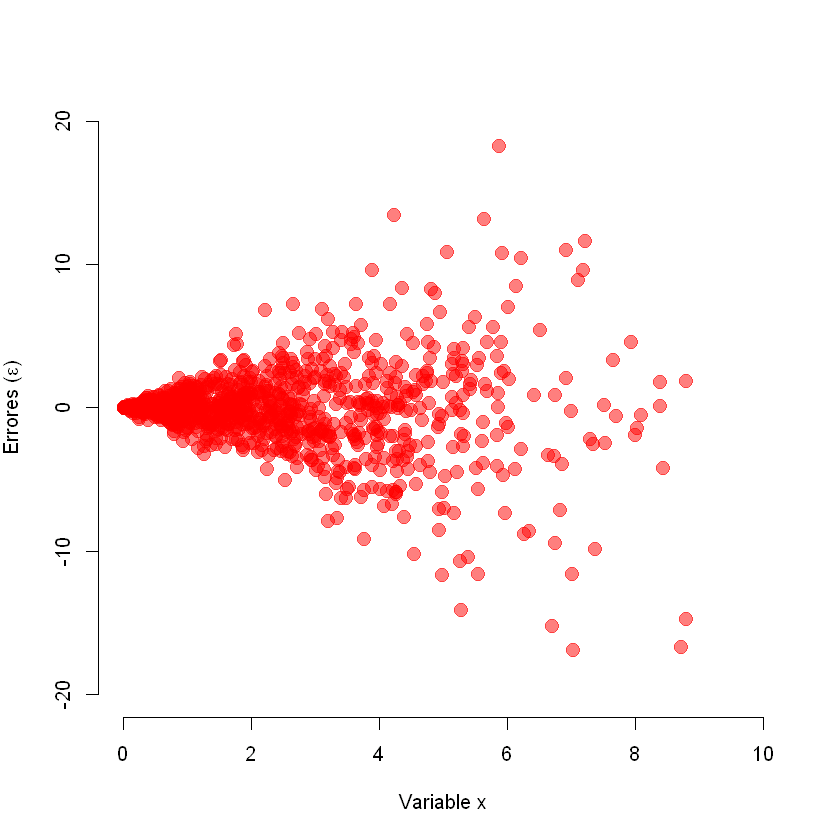

In [5]:
install.packages("scales"); library(scales)
set.seed(080925)
x <- abs(rnorm(1000, 0, 3))
e <- rnorm(1000, 0, 1)*x
plot(x, e, ylim = c(-20, 20), xlim = c(0, 10), xlab = "Variable x", ylab = expression(paste("Errores (", epsilon, ")")), cex = 1.5, pch = 19, col = alpha("red", 0.5), frame = F)

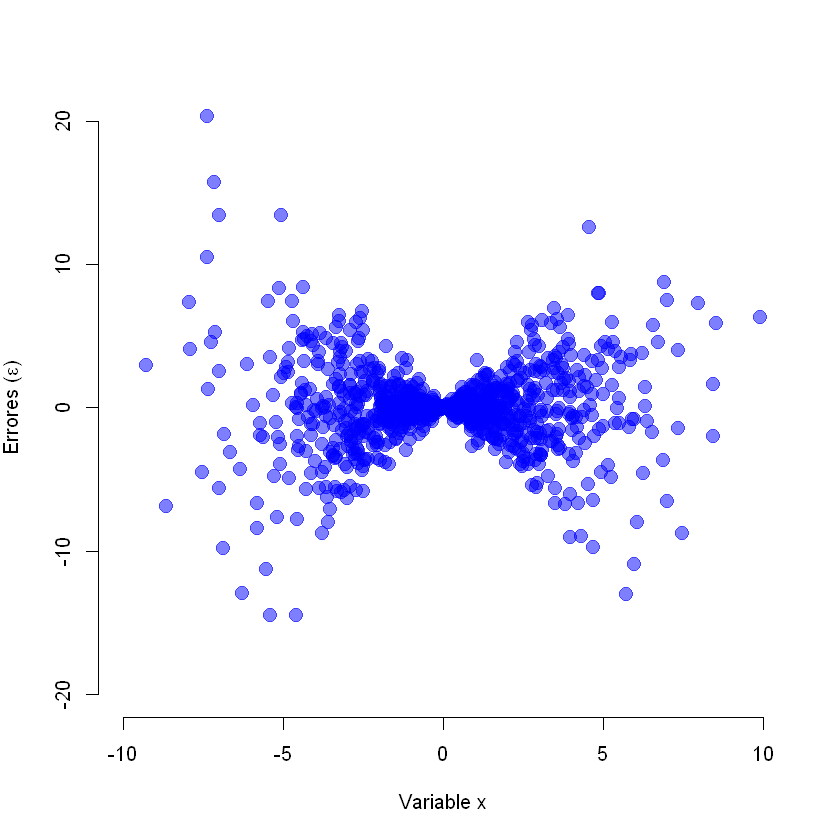

In [6]:
x <- rnorm(1000, 0, 3)
e <- rnorm(1000, 0, 1)*x
plot(x, e, ylim = c(-20, 20), xlim = c(-10, 10), xlab = "Variable x", ylab = expression(paste("Errores (", epsilon, ")")), cex = 1.5, pch = 19, col = alpha("blue", 0.5), frame = F)

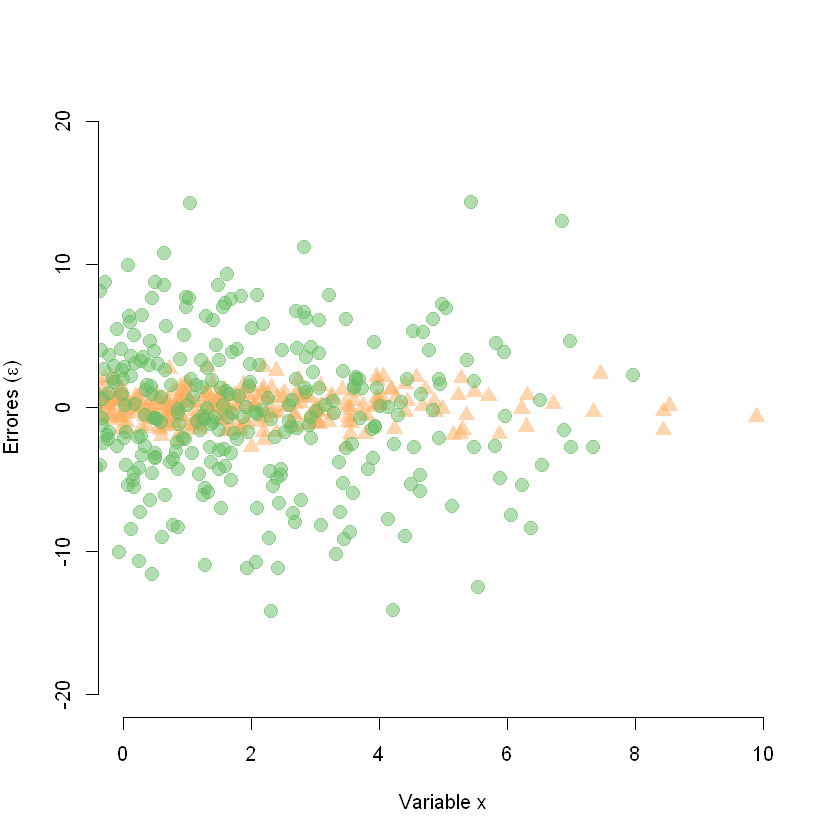

In [7]:
e <- c(rnorm(500, 0, 1), rnorm(500, 0, 5)) 
f <- c(rep(1, 500), rep(0, 500))

markers <- c(19, 17)
colors <- c("#66BD63", "#FDAE61")
plot(x, e, ylim = c(-20, 20), xlim = c(0, 10), xlab = "Variable x", ylab = expression(paste("Errores (", epsilon, ")")), cex = 1.5, pch = markers[factor(f)], col = alpha(colors[factor(f)], 0.5), frame = F)

## ¿Por qué nos interesa la heteroscedasticidad?

Recordemos que en regresión simple encontramos que: 

\begin{align*}
    \hat\beta_1 & = \frac{\widehat{Cov(x, y)}}{\widehat{V(x)}} = \frac{\sum_i (X_i - \overline X)(Y_i - \overline Y)}{\sum_i (X_i - \overline X)^2}\\
    & = \beta_1 + \frac{\sum_i (X_i - \overline X) \cdot \varepsilon_i}{\sum_i (X_i - \overline X)^2} \\     
\end{align*}

Si asumimos que $E(\varepsilon_i | X) = 0$, podemos concluir que $E(\hat\beta_1) = \beta_1$. Es decir, **nuestros estimadores seguirán siendo insesgados** a pesar de que la varianza de los errores no es constante.

Si asumimos que $Cov(\varepsilon_i, \varepsilon_j) = 0$, podemos mostrar que: 

$$ee(\hat\beta_1) = \sqrt{V(\hat\beta_1)} = \sqrt{\frac{\sigma_i^2}{\sum_i (X_i - \overline X)^2}}$$

La **heteroscedasticidad** afecta los errores estándar de nuestros estimadores.

**En presencia de heteroscedasticidad**, asumir que la varianza de los errores es constantes implica que nuestros **errores estandar** están **sesgados**.

Por lo tanto,

- los intervalos de confianza son incorrectos, y
- las pruebas de significancia ($t$ y $F$) no son validas

**Solución**:

1. **Probar** que hay presencia de heteroscedasticidad

Prueba de Goldfeld-Quandt

Prueba de Breusch-Pagan

Prueba de White
   
2. **Corrección** de los estimadores de la varianza

Evitar error de especificación

Mínimos Cuadrados Ponderados

Erorres estándar robustos

## Prueba de Goldfeld-Quandt

Para determinar si existe heteroscedasticidad, podemos usar los **residuales** $e_i = y_i - \hat y_i$ como un **estimador de los errores poblaciones** $\varepsilon_i$

Recuerde que un estimador de la varianza del modelo (i.e., $\sigma^2$) es 

$$\widehat\sigma^2 = \frac{SSE}{n-k} = \frac{\sum_{i=1}^n e_i^2}{n-k}$$

Observe que podemos dividir la población en dos grupos de tamaño $n_1$ y $n_2$ y evaluar si:

$H_0: \sigma_1^2 = \sigma_2^2$
$H_1: \sigma_1^2 \neq \sigma_2^2$

Para ello usaremos el estadístico de prueba

$$F_{stat} = \frac{SSE_2/(n_2 - k)}{SSE_1/(n_1 - k)} \sim F_{n_2-k \hspace{2pt},\hspace{2pt} n_1-k}$$

**Esta prueba es muy dependiente de la forma funcional de la heteroscedasticidad**, veamos por qué!

## Prueba de Breusch-Pagan

Una segunda prueba que podemos realizar es la prueba de **Breusch-Pagan**.  
Asumimos que existe una relación lineal:

$$
\sigma_i^2 = \sigma^2 f(\alpha_0 + \alpha_1 X)
$$

Hacemos una prueba de hipótesis de la forma:

$$
H_0 : \alpha_1 = 0 \;\;\; \Rightarrow \;\; \text{Homoscedasticidad } = \sigma^2 f(\alpha_0)
$$

$$
H_1 : \alpha_1 \neq 0 \;\;\; \Rightarrow \;\; \text{Heteroscedasticidad } = \sigma^2 f(\alpha_0 + \alpha_1 X)
$$

En esta prueba vamos a evaluar la relación estadística entre:

$$
e_i^2 \quad \text{y ciertas variables explicativas } X
$$

## Procedimiento: Prueba de Breusch-Pagan

1. **Correr la regresión original**:

$$
Y = X\beta + \varepsilon
$$

2. **Obtener**:

$$
\hat{\sigma}^2 = \frac{\sum e_i^2}{n-k}
$$

3. **Calcular** y **Estimar**:

$$
p_i = \frac{e_i^2}{\hat{\sigma}^2}
$$

$$
p_i = X\alpha + u
$$

5. **Calcular el estadístico de prueba**:

$$
\Theta = \frac{1}{2}SSR \sim \chi^2_m
$$

donde $m$ es el número de variables incluidas en la matriz $X$

## Prueba de White

Una segunda prueba muy parecida es la **prueba de White**. Esta prueba **no asume** que hay una relación lineal entre la varianza del error y las variables en $X$.

1. **Correr la regresión original**: $Y = X\beta + \varepsilon$

2. **Calcular los residuales al cuadrado**: $e_i^2$

3. **Correr la regresión auxiliar**:

$$e_i^2 = \alpha_0 + \alpha_1 X_1 + \alpha_2 X_2 + \alpha_3 X_1^2 + \alpha_4 X_2^2 + \alpha_5 X_1 X_2 + \dots$$

(incluir todos los cuadrados y las interacciones de las variables explicativas).

4. **Calcular el estadístico de prueba**:

$$nR^2 \sim \chi^2_p$$

donde $p$ es el número total de regresores (sin la constante) en la regresión auxiliar.

## Heteroscedasticidad y Error de Especificación

**Error de especificación con variables independientes** 

Considere la siguiente función de regresión:

$$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \varepsilon_i$$

donde $E(\varepsilon_i | X) = 0$ y $V(\varepsilon_i | X) = \sigma^2$

Suponga que omitimos $x^2$ y estimamos el siguiente modelo:

$$y_i = \gamma_0 + \gamma_1 x_i + u_i$$

$$u_i = \varepsilon_i + \beta_2 x_i^2$$

Oberve que en este caso 

$$V(u_i) = \sigma^2 + V(\beta_2 x_i^2)$$

Ya que la varianza de $u_i$ depende de $x_i$, el error de especificación genera heteroscedasticidad.

**Error de especificación de la variable dependientes** 

Considere ahora la regresión 

$$\log(y_i) = \beta_0 + \beta_1 x_i + \varepsilon_i$$

donde $E(\varepsilon_i | X) = E(\varepsilon_i)$ y $\varepsilon_i \sim N(0, \sigma^2)$. De esta manera,

$$\log(y_i) \sim N(\beta_0 + \beta_1 x_i, \sigma^2)$$

Suponga que estimamos el modelo 

$$y_i = \gamma_0 + \gamma_1 x_i + u_i$$

Observe que la varianza de $u_i$ está dada por 

$$V(u_i) = (e^{\sigma^2} - 1) e^{2(\beta_0 + \beta_1 x_i)+ \sigma^2}$$

Ya que la varianza de $u_i$ depende de $x_i$, el error de especificación genera heteroscedasticidad.

**¿Es posible solucionar la heteroscedasticidad por error de especificación?**

Errores en la especificación pueden generar heteroscedasticidad (además de otros problemas). Sin embargo, usualmente **desconocemos** la especificación correcta.

Por esta razón necesitamos una manera formal de tratar la heteroscedasticidad.

## Mínimos Cuadrados Ponderados

El método de mínimos cuadrados ponderados presenta una solución al problema de heteroscedasticidad.

Considere el siguiente modelo:

$$
y_i = \beta_0 + \beta_1 x_i + u_i, \qquad \varepsilon_i \sim N(0, \sigma_i^2)
$$

Transformamos este modelo diviendo cada observación por su desviación estándar $\sigma_i$:

$$
\frac{y_i}{\sigma_i} = \beta_0 \frac{1}{\sigma_i} + \beta_1 \frac{x_i}{\sigma_i} + \frac{\varepsilon_i}{\sigma_i}
$$

Note que el error del modelo transformado es homoscedastico:

$$
V\left(\frac{\varepsilon_i}{\sigma_i} \Big| x_i\right)
= \frac{1}{\sigma^2_i} V(\varepsilon_i | x_i)
= \frac{1}{\sigma^2_i} \sigma^2_i = 1
$$

Más aún,

$$\frac{\varepsilon_i}{\sigma_i} \sim N(0, 1)$$

Si aplicamos el método de mínimos cuadrados (MCO) para estimar el modelo transformado, los estimadores de $\beta_k$ serán insesgados y eficientes. Sin embargo, no conocemos $\sigma_i$.

Suponga ahora que: 

$$V(\varepsilon_i \mid x_i) = \sigma^2 h(x_i)$$

Este supuesto es más débil. Observe además que si conocemos $h(x_i)$, entonces podemos usar MCO para estimar el siguiente modelo transformado: 

$$
\frac{y_i}{\sqrt{h(x_i)}} = \beta_0 \frac{1}{\sqrt{h(x_i)}} + \beta_1 \frac{x_i}{\sqrt{h(x_i)}} + \frac{\varepsilon_i}{\sqrt{h(x_i)}}
$$

Nuevamente nuestro modelo transformado es homoscedastico.

## Minimos Cuadrados Factibles

Mínimos cuadrados ponderados es un caso particular de **mínimos cuadrados generalizados**. 

Bajo ciertas condiciones, podemos transformar nuestro modelo de regresión usando el estimador $\widehat{\sigma^2} = \frac{\sum_{i=1}^n e_i^2}{n-k}$. Es decir, en lugar de transformar el modelo dividiendo $\sigma_i$, dividimos por $\widehat{\sigma^2}$.

A este método se le conoce como **mínimos cuadrados factibles**.

## Errores Estándar Robustos

Para el modelo de **regresión simple**, podemos reescribir nuestro estimador de MCO de la siguiente manera:

$$
\hat\beta_1 = \beta_1 + \frac{\sum_i (x_i - \bar{x}) \varepsilon_i}{\sum_i (x_i - \bar{x})^2}
$$

Suponga que nuestro modelo es heteroscedastico, es decir:

$$
V(\varepsilon_i \mid x_i) = \sigma_i^2
$$

De esta manera,

$$
V(\hat\beta_1 \mid x_i)
= \frac{\sum_i (x_i - \bar{x})^2 \sigma_i^2}{\sum_i (x_i - \bar{x})^2}
$$

Hal White propuso el siguiente estimador para la varianza de $\hat\beta_1$:

$$
V(\hat\beta_1)
= \frac{\sum_i (x_i - \bar{x})^2 e_i^2}{\sum_i (x_i - \bar{x})^2}
$$

donde $e_i = y_i - \hat y_i$

Para el modelo de **regresión múltiple**

$$
y_i = \beta_0 + \beta_1 x_{1i} + \cdots + \beta_k x_{ki} + \varepsilon_i
$$

el estimador de varianza (robusto a heteroscedasticidad) para $\hat\beta_j$ está dado por:

$$
V(\hat\beta_j)
= \frac{\sum_i r_{ij}^2 e_i^2}{\sum_i (x_{ji} - \bar{x_j})^2}
$$

donde $r_{ij}$ es el residual para la observación $i$ luego de estimar $x_j$ en función de las demás variables independientes.

Recuerde que para nuestro modelo en forma matricial $Y = X\beta + \varepsilon$, podemos mostrar que la matriz de varianza-covarianza es:

\begin{align*}
V(\hat{\beta}|X ) &= E \big[(\hat{\beta} - E[\hat{\beta}])(\hat{\beta} - E[\hat{\beta}])' \,|\, X \big] \\
&= (X'X)^{-1}X' E[\varepsilon\varepsilon'|X] X (X'X)^{-1} \\
\end{align*}

El estimador propuesto por Hal White para $X' E[\varepsilon\varepsilon'|X] X$ está dado por:

$$S_R = \sum_{i} e_i^2 \, x_i x_i'$$

De esta manera, el estimador de White para la matriz de varianza-covarianza toma la siguiente forma:

$$
\widehat{V}(\hat{\beta}) = (X'X)^{-1} S_R (X'X)^{-1}$$

A estos errores se les conoce como **errores de White** o **robustos**, y corrigen (son robustos) cualquier forma de heteroscedasticidad.

## Sesgo por Error de Especificación

Consideremos ahora la función de regresión:

$$
y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \varepsilon_i \qquad (1)
$$

donde $E(\varepsilon_i | x_{1i}, x_{2i}) = 0$. 

Suponga que usted está interasado en estimar el efecto causal de $x_{1i}$ en $y_i$. Es decir, su parámetro de interés es $\beta_1$.

Sin embargo, usted omite la variable $x_{2i}$ y estima

$$
y_i = \beta_0 + \beta_1 x_{1i} + u_i \qquad u_i = \beta_2 x_{2i} + \varepsilon_i \qquad (2)
$$

Debido a este error de especificación, el estimador de MCO de $\beta_1$ no es un estimador insesgado. Veamos:

Recuerde que:

\begin{align*}
\hat \beta_1 &= \frac{\widehat{Cov}(x_{1i}, y_i)}{\widehat{V(x_{1i})}} \\
              &= \frac{\widehat{Cov}(x_{1i}, \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \varepsilon_i)}{\widehat{V(x_{1i})}} \\
              &= \beta_1 + \beta_2 \frac{\widehat{Cov}(x_{1i}, x_{2i})}{\widehat{V(x_{1i})}} + \frac{\widehat{Cov}(x_{1i}, \varepsilon_i)}{\widehat{V(x_{1i})}} \\
              &= \beta_1 + \beta_2 \frac{\widehat{Cov}(x_{1i}, x_{2i})}{\widehat{V(x_{1i})}} \\              
\end{align*}

Este resultado nos permite ver que: 

- si $\widehat{Cov}(x_{1i}, x_{2i}) = 0$, entonces $E(\hat\beta_1) = \beta_1$

- Sin embargo, si $\widehat{Cov}(x_{1i}, x_{2i}) \neq 0$, entonces $E(\hat\beta_1) \neq \beta_1$

En qué casos $\widehat{Cov}(x_{1i}, x_{2i}) = 0$?

## Error de Medición: Variable Dependiente

Suponga que usted está interesado en estudiar la relación entre una variable dependiente $y_i$ y una variable $x_i$. Para ello usted quiere usar el siguiente modelo:

$$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$$

Sin embargo, usted observa $y_i$ con un **error (de medición)** $\nu$. Es decir, usted observa $y_i^* = y_i + \nu$. Usualmente, asumimos que $\nu \sim N(0, \sigma^2_\nu)$. De esta manera, usted se ve ''obligado'' a estimar:

$$y_i^* = \beta_0 + \beta_1 x_i + u_i \qquad \text{ donde } u_i = \varepsilon_i + \nu$$

**¿Qué propiedades tienen los estimadores de MCO en este caso?**

Supongamos que la variable $x_i$ es exogena. Es decir, $E(\varepsilon_i | x_i) = 0$.

Así,

\begin{align*}
\hat \beta_1 &= \frac{\widehat{Cov}(x_{i}, y^*_i)}{\widehat{V(x_{i})}} \\
 &= \frac{\widehat{Cov}(x_{i}, \beta_0 + \beta_1 x_{i} + u_i)}{\widehat{V(x_{i})}} \\
 &= \beta_1 + \frac{\widehat{Cov}(x_{i}, \varepsilon_i)}{\widehat{V(x_{i})}} + \frac{\widehat{Cov}(x_{i}, \nu)}{\widehat{V(x_{i})}} \\ 
 &= \beta_1 + \frac{\widehat{Cov}(x_{i}, \nu)}{\widehat{V(x_{i})}} \\  
\end{align*}

Observe que el error de medición puede sesgar los estimadores de MCO si existe una correlación entre el error de medición y las variables independientes, es decir si $\widehat{Cov}(x_{i}, \nu) \neq 0$.

Observe además que $V(u_i) = V(\varepsilon_i + \nu) = \sigma^2 + \sigma_\nu^2 > \sigma^2$. Luego, en presencia de error de medición, nuestros errores estandar serán mayores.

## Error de Medición: Variable Independiente

Suponga ahora que usted tiene error de medición en la variable dependiente $x_i$. Es decir, usted observa $y_i$ y $x_i^* = x_i + \nu$, con $\nu \sim N(0, \sigma_nu)$. 

La función de regresión poblaciones es:

$$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$$

Sin embargo, usted estima:

$$y_i = \beta_0 + \beta_1 x^*_i + u_i \qquad \text{ donde } u_i = \varepsilon_i -  \beta_1 \nu $$

Si asumimos que $Cov(x^*_i, \nu) = 0$, entonces MCO produce estimadores insesgados. Sin embargo, la $V(u_i) = \sigma^2 + \beta_1^2 \sigma_\nu^2$.

Debido a que este es el caso menos problemático, estamos más interesados en saber qué ocurre cuando asumimos que $Cov(x_i, \nu) = 0$

Si este el caso, entonces $Cov(x_i^*, \nu) \neq 0$. Esto es asi porque $Cov(x_i, \nu) = Cov(x_i^*, \nu) - \sigma^2_\nu = 0$. Luego, $Cov(x_i^*, \nu) = \sigma^2_\nu > 0$.

Usando las propiedades de los estimadores, podemos mostrar que 

\begin{align*}
E(\hat \beta_1) &= \beta_1 + \frac{Cov(x_i^*, \varepsilon_i -  \beta_1 \nu )}{V(x_i^*)} \\
&= \beta_1 - \frac{\beta_1 \sigma^2_\nu}{\sigma^2_x + \sigma^2_\nu} \\
&= \beta_1 \left(1 - \frac{\sigma^2_\nu}{\sigma^2_x + \sigma^2_\nu}\right) \\
&= \beta_1 \left(\frac{\sigma^2_x}{\sigma^2_x + \sigma^2_\nu}\right) \\
\end{align*}

A este sesgo se le conoce como **sesgo de atenuación**.